<a href="https://colab.research.google.com/github/eunzzae/dacon_Ecommerce/blob/main/Dacon_%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EA%B3%A0%EA%B0%9D%EB%B6%84%EB%A5%98_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 각자 작업 환경에 맞는 경로를 지정해주세요. Google Colab과 Jupyter환경에서 경로가 다를 수 있습니다.
base_path = '/content/drive/MyDrive/Colab Notebooks/data/dacon_ecomerce/'
df_customer = pd.read_csv(base_path+'Customer_info.csv')
df_discount = pd.read_csv(base_path+'Discount_info.csv')
df_marketing = pd.read_csv(base_path+'Marketing_info.csv')
df_onlinesales = pd.read_csv(base_path+'Onlinesales_info.csv')
df_tax = pd.read_csv(base_path+'Tax_info.csv')

# 데이터 확인

In [ ]:
# 결측치 확인 => 전부 결측값 0
df_customer.isnull().sum()
df_discount.isnull().sum()
df_marketing.isnull().sum()
df_onlinesales.isnull().sum()
df_tax.isnull().sum()

제품카테고리    0
GST       0
dtype: int64

### df_customer

In [ ]:
df_customer.info()
df_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


,가입기간
count,1468.000000
mean,25.912125
std,13.959667
min,2.000000
25%,14.000000
50%,26.000000
75%,38.000000
max,50.000000


### df_discount

In [ ]:
df_discount.info()
df_discount.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


,할인율
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


### df_marketing

In [ ]:
df_marketing.info()
df_marketing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


,오프라인비용,온라인비용
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


### df_onlinesales

In [ ]:
df_onlinesales.info()
df_onlinesales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


,수량,평균금액,배송료
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


### df_tax

In [ ]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
df_onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
df_marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
df_discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


## 피처엔지니어링

In [ ]:
month = {'Jan': '01',
         'Feb': '02',
         'Mar': '03',
         'Apr':'04',
         'May':'05',
         'Jun':'06',
         'Jul':'07',
         'Aug':'08',
         'Sep':'09',
         'Oct':'10',
         'Nov':'11',
         'Dec':'12'}

df_discount['월']=df_discount['월'].map(month)
print(df_discount)

      월                제품카테고리    쿠폰코드  할인율
0    01               Apparel  SALE10   10
1    02               Apparel  SALE20   20
2    03               Apparel  SALE30   30
3    01              Nest-USA  ELEC10   10
4    02              Nest-USA  ELEC20   20
..   ..                   ...     ...  ...
199  11  Notebooks & Journals    NJ20   20
200  12  Notebooks & Journals    NJ30   30
201  10               Android   AND10   10
202  11               Android   AND20   20
203  12               Android   AND30   30

[204 rows x 4 columns]


## 데이터 병합

In [ ]:
df_train = df_onlinesales.merge(df_customer, on='고객ID', how='left')
print(df_train)

            고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간

In [ ]:
df_train['월'] =df_train['거래날짜'].str[5:7]
df_merge = pd.merge(df_train, df_discount, on=['월','제품카테고리'],how='left')
df_merge = pd.merge(df_merge, df_tax, on=['제품카테고리'], how='left')
print(df_merge)

            고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태 성별        고객지역  가입기간

In [ ]:
# # 파일저장
# file_path = '/content/drive/MyDrive/Colab Notebooks/data/dacon_ecomerce/Merge.csv'
# df_merge.to_csv('Merge.csv', index=False, encoding='utf-8')

# 피처요약표

In [ ]:
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫 번째 값'] = df.loc[0].values
  summary['두 번째 값'] = df.loc[1].values

  return summary
resumetable(df_merge)

데이터셋 형상: (52924, 16)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,고객ID,object,0,1468,USER_1358,USER_1358
1,거래ID,object,0,25061,Transaction_0000,Transaction_0001
2,거래날짜,object,0,365,2019-01-01,2019-01-01
3,제품ID,object,0,1145,Product_0981,Product_0981
4,제품카테고리,object,0,20,Nest-USA,Nest-USA
5,수량,int64,0,151,1,1
6,평균금액,float64,0,546,153.71,153.71
7,배송료,float64,0,267,6.5,6.5
8,쿠폰상태,object,0,3,Used,Used
9,성별,object,0,2,남,남


# 시각화

In [ ]:
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


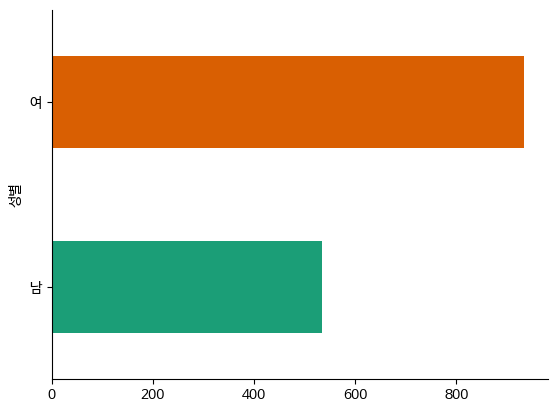

In [ ]:
# @title 성별

from matplotlib import pyplot as plt
import seaborn as sns
df_customer.groupby('성별').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

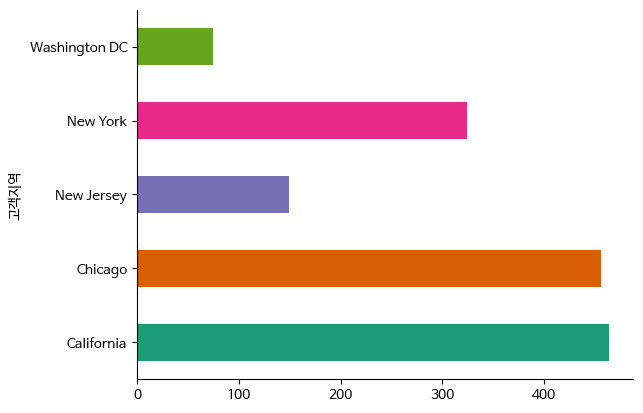

In [ ]:
# @title 고객지역

from matplotlib import pyplot as plt
import seaborn as sns
df_customer.groupby('고객지역').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

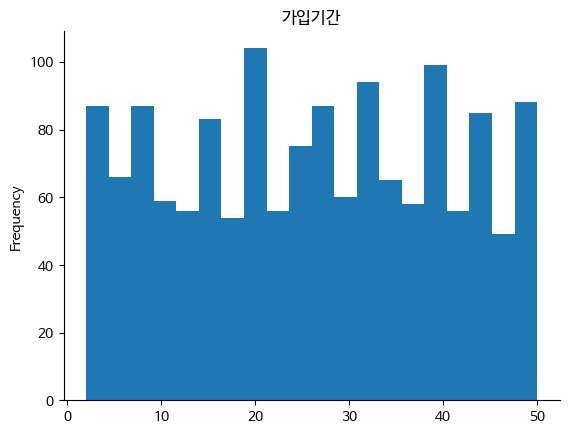

In [ ]:
# @title 가입기간

from matplotlib import pyplot as plt
df_customer['가입기간'].plot(kind='hist', bins=20, title='가입기간')
plt.gca().spines[['top', 'right',]].set_visible(False)

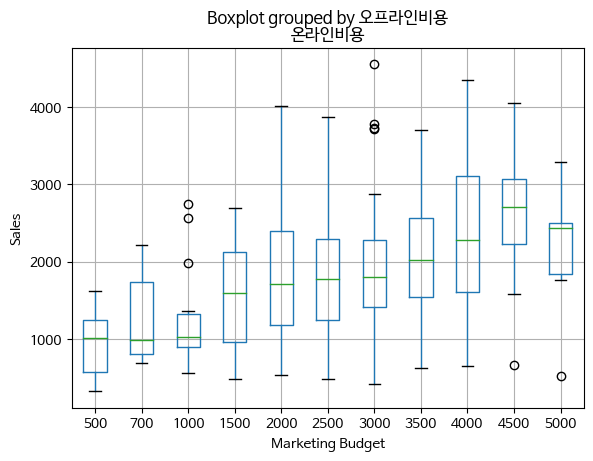

In [ ]:
# @title Distribution of Sales by Marketing Budget

import matplotlib.pyplot as plt
df_marketing.boxplot(column='온라인비용', by='오프라인비용')
plt.xlabel('Marketing Budget')
_ = plt.ylabel('Sales')

In [ ]:
df_onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


<ipython-input-26-e65f6a2d821e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_onlinesales, x='수량', y='쿠폰상태', inner='box', palette='Dark2')


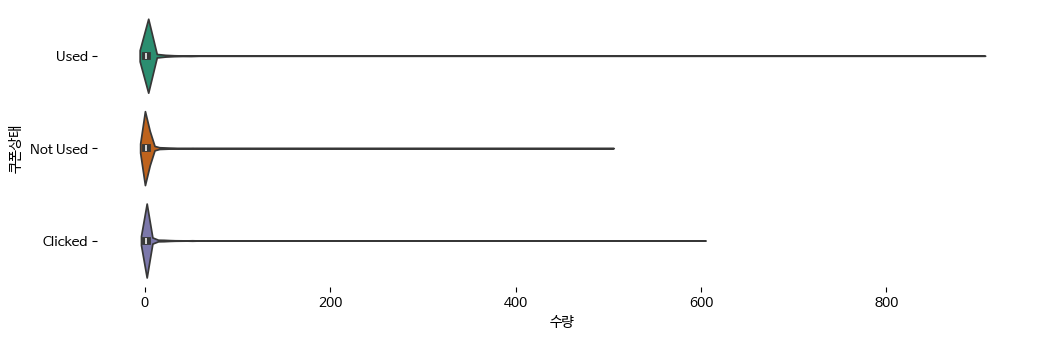

In [ ]:
# @title 쿠폰상태 vs 수량

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_onlinesales['쿠폰상태'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_onlinesales, x='수량', y='쿠폰상태', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-27-c4b672659430>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_onlinesales, x='평균금액', y='쿠폰상태', inner='box', palette='Dark2')


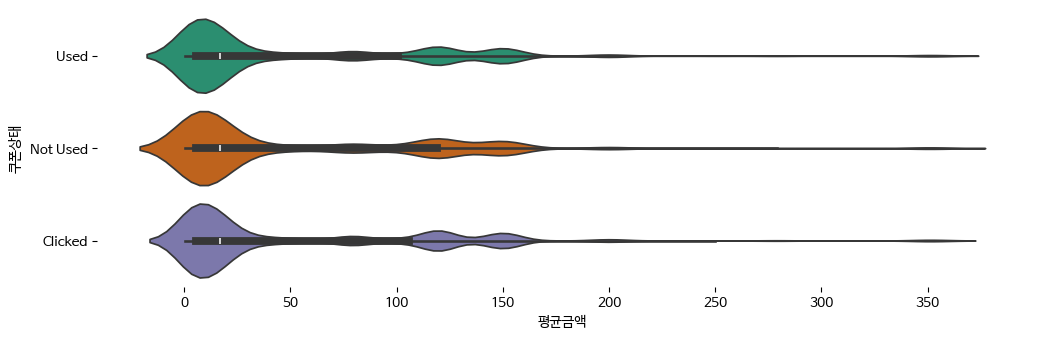

In [ ]:
# @title 쿠폰상태 vs 평균금액

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_onlinesales['쿠폰상태'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_onlinesales, x='평균금액', y='쿠폰상태', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

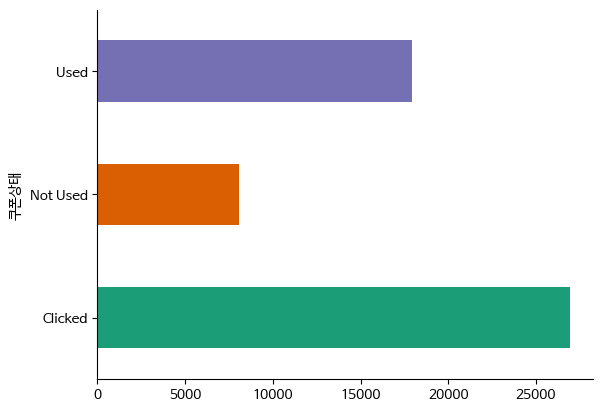

In [ ]:
# @title 쿠폰상태

from matplotlib import pyplot as plt
import seaborn as sns
df_onlinesales.groupby('쿠폰상태').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

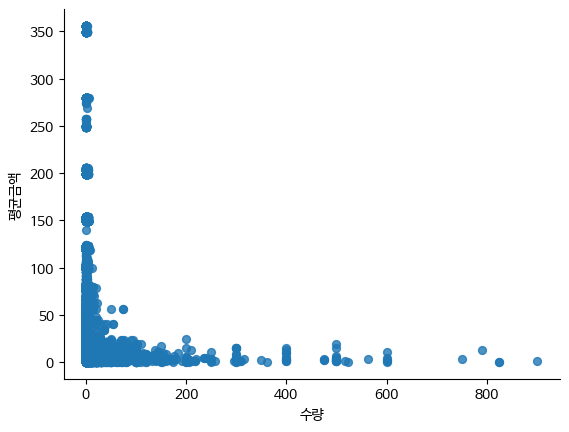

In [ ]:
# @title 수량 vs 평균금액

from matplotlib import pyplot as plt
df_onlinesales.plot(kind='scatter', x='수량', y='평균금액', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

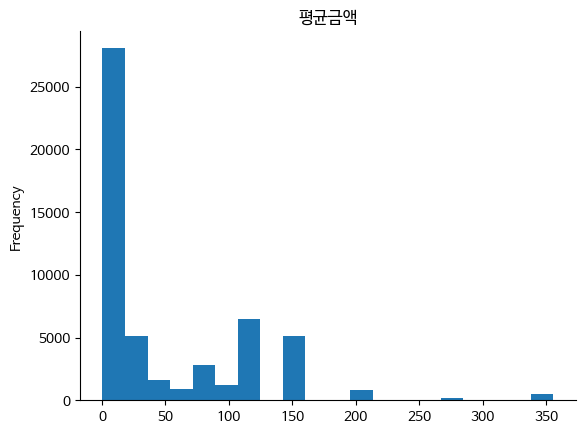

In [ ]:
# @title 평균금액

from matplotlib import pyplot as plt
df_onlinesales['평균금액'].plot(kind='hist', bins=20, title='평균금액')
plt.gca().spines[['top', 'right',]].set_visible(False)

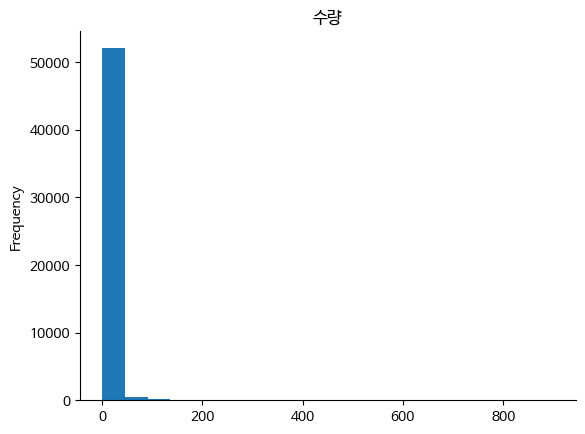

In [ ]:
# @title 수량

from matplotlib import pyplot as plt
df_onlinesales['수량'].plot(kind='hist', bins=20, title='수량')
plt.gca().spines[['top', 'right',]].set_visible(False)